In [545]:
# Plot related imports

import matplotlib.font_manager as font_manager
import matplotlib.patches as patches
import matplotlib.dates as matdates
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
from os.path import expanduser
import matplotlib as mpl
import seaborn as sns

sns.set_style("ticks")
fontpath = expanduser('~/.local/share/fonts/LinLibertine_DRah.ttf')
prop = font_manager.FontProperties(fname=fontpath)

params = {
    "axes.titlesize" : 16,
    'axes.labelsize': 12,
    'font.size': 12,
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'font.family': prop.get_name(),
    'text.usetex': True
}

mpl.rcParams.update(params)

In [ ]:
# Other imports

from helpers import jaccard, populate_bin_with_channel, add_user_to_bin, bins, bins_t_o,  bins_y_o, bin_to_df, \
                    add_user_categories_to_bin, mean_confidence_interval, normalize_user_bins, \
                    find_users_constraint, find_users_other_bin, estimate_for_users
from matplotlib.lines import Line2D
from sqlitedict import SqliteDict
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import pandas as pd

In [191]:
# Helper functions

def correct_cats(i, df_l):
    
    if i["subreddit"] == "gaming":
        i["category"] = "gaming"
        return i

    if i["subreddit"] == "random":
        i["category"] = "random"
        return i
    
    cat = df_l[i["subreddit"]]
    i["category"] = cat
    return i


def add_user_categories_to_bin(b, user, category, timestamp_v):
    for lower, upper in b.keys():
        if upper > timestamp_v >= lower:
            user_at_b = b[(lower, upper)].get(user, {"pua": 0, "incels": 0, "trp": 0,
                                                     "health": 0, "mgtow": 0, "mra": 0, "random": 0,
                                                    "gaming": 0})
            
            # weird mistake where some of these are series, caused by duplicates in labels
            try:
                cat_at_b = user_at_b.get(category, 0)
            except:
                category = category.values[0]
                cat_at_b = user_at_b.get(category, 0)

            cat_at_b += 1
            user_at_b[category] = cat_at_b
            b[(lower, upper)][user] = user_at_b
            break

def estimate_for_users(b, key, users_to_track, estimate):
    return estimate([b[key][user] for user in users_to_track])

In [27]:
# Helper variables

channel_dict = SqliteDict("/data/savvas/incels/data/channels_dict.sqlite", tablename="channels", flag="r")
authors_dict = SqliteDict("/data/savvas/incels/data/authors_dict.sqlite", tablename="authors", flag="r")
df_labels = pd.read_csv("../helpers/labels.csv")
cats = ["pua", "incels", "trp", "health", "mgtow", "mra", "gaming", "random"]
df_labels = df_labels.set_index("subreddits")
bin_users = {b:dict() for b in bins_y_o}
df_l = dict(df_labels.category)

In [35]:
# Loads variables

min_num_users = 2
idx = -1

for key, item in authors_dict.iteritems():
    try:
        idx += 1
        if idx % 1000 == 0:
            print(idx)
        
        relevant_items = [correct_cats(i, df_l) for i in item]

        if len(relevant_items) < min_num_users:
            continue
            
        for comment in relevant_items:
            add_user_categories_to_bin(bin_users, key, comment["category"], comment["timestamp"] * 1000)

    except:
        print(comment)
        break

normalize_user_bins(bin_users)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


1165000
1166000
1167000
1168000
1169000
1170000
1171000
1172000
1173000
1174000
1175000
1176000
1177000
1178000
1179000
1180000
1181000
1182000
1183000
1184000
1185000
1186000
1187000
1188000
1189000
1190000
1191000
1192000
1193000
1194000
1195000
1196000
1197000
1198000
1199000
1200000
1201000
1202000
1203000
1204000
1205000
1206000
1207000
1208000
1209000
1210000
1211000
1212000
1213000
1214000
1215000
1216000
1217000
1218000
1219000
1220000
1221000
1222000
1223000
1224000
1225000
1226000
1227000
1228000
1229000
1230000
1231000
1232000
1233000
1234000
1235000
1236000
1237000
1238000
1239000
1240000
1241000
1242000
1243000
1244000
1245000
1246000
1247000
1248000
1249000
1250000
1251000
1252000
1253000
1254000
1255000
1256000
1257000
1258000
1259000
1260000
1261000
1262000
1263000
1264000
1265000
1266000
1267000
1268000
1269000
1270000
1271000
1272000
1273000
1274000
1275000
1276000
1277000
1278000
1279000
1280000
1281000
1282000
1283000
1284000
1285000
1286000
1287000
1288000
1289000


In [546]:
# Does tracking

targets_constraints = {
    "pua": ["random", "incels", "trp", "mgtow", "mra"],
    "incels": ["pua", "random", "trp", "mgtow", "mra"],
    "trp": ["pua", "incels", "random", "mgtow", "mra"],
    "mgtow": ["pua", "incels", "trp", "random", "mra"],
    "mra": ["pua", "incels", "trp", "mgtow", "random"]
}

estimates = []
for target, contraints in targets_constraints.items():
    print("target:", target)
    for cname in contraints:
        print("from:", cname)
        already_tracked = set()

        for start in reversed(list(range(1, 11))):

            tracked_initial = find_users_constraint(bin_users, bins_y_o[start], 
                                            lambda x: x[target] > 0)
            
            
            tmp = {}
            
            tracked_users = set()
            tracked_all = set()

            for back in list(range(start-1,start)):
                bin_key = bins_y_o[back]
                
                cons = lambda x: x[cname] > 0 \
                        if cname != "random" else  x["random"] > 0 and \
                        x["pua"] + x["incels"] + x["trp"] + x["mgtow"] + x["mra"] == 0
                
                tracked_all = tracked_all.union(find_users_constraint(bin_users, bin_key, cons))
                
                tracked_users = tracked_users.union(set(find_users_other_bin(bin_users, bin_key, 
                                                                             tracked_initial, cons)))


            if len(tracked_initial) == 0 or len(tracked_initial_p) == 0:
                continue
                
            tmp["idxo"] = start
            tmp["idx"] = bins_y_o[start]
            tmp["target"] = target
            tmp["from"] = cname
            print(tmp["target"], tmp["from"])
            tmp["pct"] = len(tracked_users) / len(tracked_initial)
            tmp["pct_a"] = len(tracked_users) / len(tracked_all) if len(tracked_all) > 0  else 0
            
            estimates.append(tmp)
            
            print(bins_t_o[start], tmp["pct"], tmp["pct_a"])
            
df = pd.DataFrame(estimates)

target: pua
from: random
pua random
2018 0.12511214114832536 0.00971197762211789
pua random
2017 0.11649498209469915 0.007944021031305775
pua random
2016 0.1258101585842335 0.007788135400305038
pua random
2015 0.1271283939254487 0.008933455859565535
pua random
2014 0.13049095607235142 0.012403418103668833
pua random
2013 0.12959138765699585 0.020405226040650537
pua random
2012 0.11860442130926103 0.03465937536103516
pua random
2011 0.10189897663218957 0.03597163997449916
pua random
2010 0.11087938825165103 0.042732752846617546
pua random
2009 0.13607990012484394 0.017709179528838343
from: incels
pua incels
2018 0.028857655502392346 0.015752530199151158
pua incels
2017 0.022680047747468943 0.017356881851400732
pua incels
2016 0.016410020684900023 0.02824367088607595
pua incels
2015 0.01664365700260776 0.0351787306476453
pua incels
2014 0.01661642262417456 0.0360676170444808
pua incels
2013 0.024882358915332272 0.04512801620924664
pua incels
2012 0.030211181761275657 0.06788569736452472


mgtow random
2017 0.127009702616554 0.010931696493174473
mgtow random
2016 0.12579641428359756 0.004831660178925084
mgtow random
2015 0.10422740524781342 0.0015414590502779747
mgtow random
2014 0.10531750129065565 0.0006959013457503966
mgtow random
2013 0.13101604278074866 0.0002611954221504379
mgtow random
2012 0.04838709677419355 2.8882812800862635e-05
from: mra
mgtow mra
2018 0.06370115820287642 0.07609659681220383
mgtow mra
2017 0.07923219727486076 0.05324733410230456
mgtow mra
2016 0.10157060305230405 0.04022297198181018
mgtow mra
2015 0.14795918367346939 0.023832584896246074
mgtow mra
2014 0.1590087764584409 0.010357815442561206
mgtow mra
2013 0.23796791443850268 0.0029403019591000695
mgtow mra
2012 0.3064516129032258 0.0012135922330097086
target: mra
from: pua
mra pua
2018 0.016208804661867686 0.029267430036694814
mra pua
2017 0.01930922636393584 0.03502643070558492
mra pua
2016 0.023492855629575576 0.03827274121797822
mra pua
2015 0.03476602611119261 0.04252799310938846
mra pua

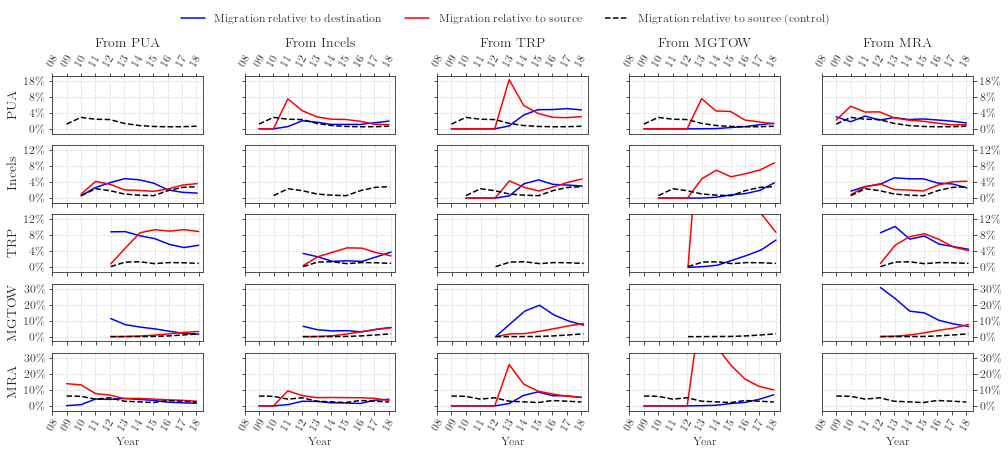

In [544]:
# plots figure

fig = plt.figure(
    constrained_layout=False,
    figsize=(16.5, 6),
)

ylims = [ 
    (-0.018, 0.198), 
    (-0.012, 0.132), 
    (-0.012, 0.132), 
    (-0.03, 0.33),
    (-0.03, 0.33)
]

yticklabels = [
    ["0\%", "4\%", "8\%", "18\%"],
    ["0\%", "4\%", "8\%", "12\%"],
    ["0\%", "4\%", "8\%", "12\%"],
    ["0\%", "10\%", "20\%", "30\%"],
    ["0\%", "10\%", "20\%", "30\%"]
]


yticks = [ 
    [0, 0.06, 0.12, 0.18], 
    [0, 0.04, 0.08, 0.12], 
    [0, 0.04, 0.08, 0.12], 
    [0, 0.1, 0.2, 0.3],
    [0, 0.1, 0.2, 0.3]
]

correct_names = {"pua":"PUA", "incels":"Incels", "trp":"TRP", 
                 "mgtow":"MGTOW", "mra":"MRA", "random":"random"}


gs = fig.add_gridspec(nrows=5, ncols=5, wspace=0.275, top=0.90)
axs = []
for i in range(25):
    axs.append(fig.add_subplot(gs[i//5, i%5]))
    
for idy, (target, sources) in enumerate(targets_constraints.items()):

    for idx, source in enumerate(sources):
        ax = axs[idx + idy*5]
        
        df_tmp = df[(df["from"] == source) & (df["target"] == target)]
        df_tmp2 = df[(df["from"] == "random") & (df["target"] == target)]

        if source != "random":
            sns.lineplot(x="idxo", y="pct", data=df_tmp, ax=ax, color="blue")
            sns.lineplot(x="idxo", y="pct_a", data=df_tmp, ax=ax, color="red")
        l = sns.lineplot(x="idxo", y="pct_a", data=df_tmp2, ax=ax, color="black")
        l.lines[-1].set_linestyle("--")
        
        ax.set_xlabel("")
        ax.set_ylabel("")
        
        if idy == 0:
            ax.set_title("From "+ correct_names[source] if source != "random" else "From PUA", fontsize=14)
            ax.xaxis.tick_top()

        if idx == 0:
            ax.set_ylabel( correct_names[target], fontsize=14)
            ax.set_yticklabels(yticklabels[idy])
        else:
            ax.set_ylabel("")
            ax.set_yticklabels([])
        
        if idy == 4 or idy == 0:
            ax.set_xticklabels([v[-2:] for v in bins_t_o], rotation=60)

        if idy == 4:
            ax.set_xlabel("Year")
            
        else:
            ax.set_xticklabels([])
            
        if idy == 0:
            ax.set_xticklabels([v[-2:] for v in bins_t_o], rotation=60)
            
        if idx == 4:
            ax.yaxis.tick_right()
            ax.set_yticklabels(yticklabels[idy])

        
        ax.set_ylim(ylims[idy])
        ax.set_xticks(list(range(11)))
        ax.set_yticks(yticks[idy])
        ax.xaxis.grid(color="#DCDCDC", linestyle='dashed')
        ax.yaxis.grid(color="#DCDCDC", linestyle='dashed')
        

import matplotlib.patches as patches
import matplotlib.dates as matdates
from matplotlib.lines import Line2D
list_mak = [mmark.MarkerStyle('.'),mmark.MarkerStyle(','),mmark.MarkerStyle('o')]

custom_lines = [
    Line2D([0], [0], color="blue", lw=1.5),
    Line2D([0], [0], color="red", lw=1.5),
    Line2D([0], [0], color="black", lw=1.5, ls="--"),
]

axs[2].legend(custom_lines, ['Migration relative to destination', 'Migration relative to source', 
                             'Migration relative to source (control)'], 
          loc="center", ncol=3, bbox_to_anchor=(0.45, 2), frameon=False, fontsize=12)

fig.savefig("user_migra_reddit.pdf", bbox_inches='tight')
fig.savefig("user_migra_reddit.png", bbox_inches='tight')